In [1]:
import os
import requests
import json
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
DATA_PATH = "../data"

In [3]:
def load_data():
    
    pass
    

In [4]:
ids = [file_name.replace(".json", "") for file_name in os.listdir(DATA_PATH) if file_name.find(".json") != -1] 

In [5]:
grades = []
grade_dict = {}
grade_ct = 0
for num in range(6, 9):
    for let in ["A","B","C"]:
        for pls in ["","+"]:
            grades.append(str(num)+let+pls)
            grade_dict[str(num)+let+pls] = grade_ct
            grade_ct += 1

In [6]:
data_dict = {}
for id in ids:
    with open(os.path.join(DATA_PATH, id + ".json"), "r") as f:
        js = json.load(f)

    boulder = np.load(os.path.join(DATA_PATH, id + ".npz"))["arr_0"]

    data_dict[id] = {
        "meta_info": js,
        "boulder": boulder,
    }
    

In [7]:
boulder_nps = np.array([data_dict[key]["boulder"] for key in list(data_dict.keys())])
boulder_meta = pd.DataFrame.from_records(np.array([data_dict[key]["meta_info"] for key in list(data_dict.keys())]))

In [8]:
boulder_meta["holdsetup_description"] = boulder_meta["holdsetup"].apply((lambda row: row["description"]))
boulder_meta["holdsetup_holdsets"] = boulder_meta["holdsetup"].apply((lambda row: row["holdsets"]))
boulder_meta["holdsetup_apiId"] = boulder_meta["holdsetup"].apply((lambda row: row["apiId"]))

boulder_meta['grade'] = pd.Categorical(boulder_meta['grade'], grades)
boulder_meta["grade_num"] = boulder_meta["grade"].apply((lambda row: grade_dict[row]))

In [9]:
boulder_meta.head()

,name,grade,userGrade,setbyId,setby,method,userRating,repeats,holdsetup,isBenchmark,...,hasBetaVideo,moonBoardConfigurationId,apiId,dateInserted,dateUpdated,dateDeleted,holdsetup_description,holdsetup_holdsets,holdsetup_apiId,grade_num
0,Ease,6C,6C,48742AFC-45F1-4FBA-A099-9796FE1B8E82,Ah Hen,Feet follow hands,4,222,"{'description': 'MoonBoard Masters 2019', 'hol...",False,...,False,1,358786,2019-12-22T21:46:09.117,2023-09-24T20:24:32.643,None,MoonBoard Masters 2019,None,17,4
1,Undine,6C+,None,0E1C9C74-B559-4C92-BA35-0154EB68BFA2,Flo Brand,Feet follow hands,5,3,"{'description': 'MoonBoard Masters 2019', 'hol...",False,...,False,1,364001,2020-02-23T20:59:58.27,2021-12-15T10:46:19.917,None,MoonBoard Masters 2019,None,17,5
2,TEA AND STRUMPETS,7A,None,24AEE562-9728-4B8F-BE60-57DE976B087A,Adam Smith,Feet follow hands,5,1,"{'description': 'MoonBoard Masters 2019', 'hol...",False,...,False,1,366557,2020-03-28T14:27:23.757,2021-12-15T10:46:19.917,None,MoonBoard Masters 2019,None,17,6
3,god forsaken,7A,None,151F07D2-8E76-4814-8E68-8AE4B4E5670E,Samuel Pugin,Feet follow hands,0,0,"{'description': 'MoonBoard Masters 2019', 'hol...",False,...,True,1,376143,2020-09-09T15:02:11.973,2021-02-14T09:22:22.84,None,MoonBoard Masters 2019,None,17,6
4,COFFEE & SUGAR,6B,6B,4ea41116-c6b7-4784-b418-442b25712278,Adrian Landreth,Feet follow hands,4,16,"{'description': 'MoonBoard Masters 2019', 'hol...",False,...,False,1,365222,2020-03-09T00:17:57.57,2022-06-13T12:52:32.313,None,MoonBoard Masters 2019,None,17,2


/home/florian/GitRepos/8aPlus/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/florian/GitRepos/8aPlus/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='grade', ylabel='Count'>

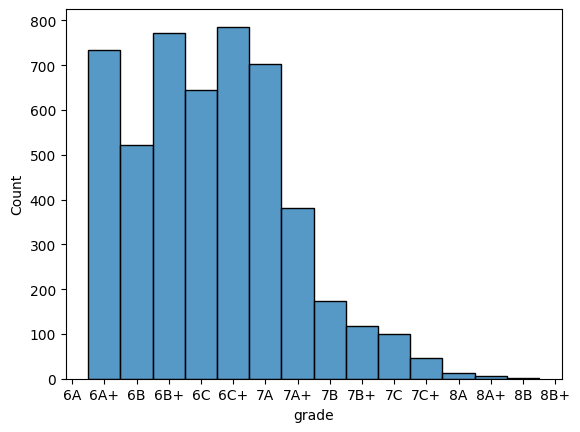

In [10]:
sns.histplot(data=boulder_meta, x="grade")

In [11]:
boulder_meta["repeats"].sort_values()

860         0
4057        0
873         0
4062        0
2972        0
        ...  
1974    17792
1119    18196
4061    19192
4440    20615
521     23368
Name: repeats, Length: 5000, dtype: int64

Start Holds:


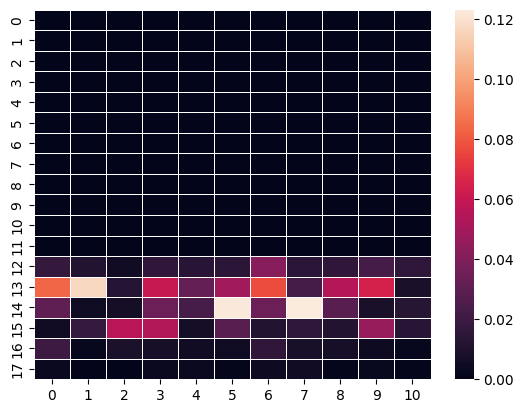

Top Holds:


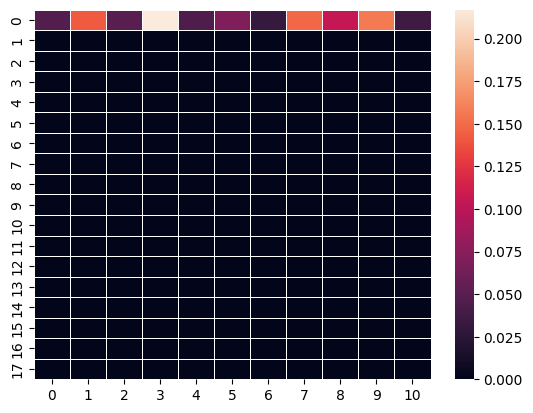

Holds:


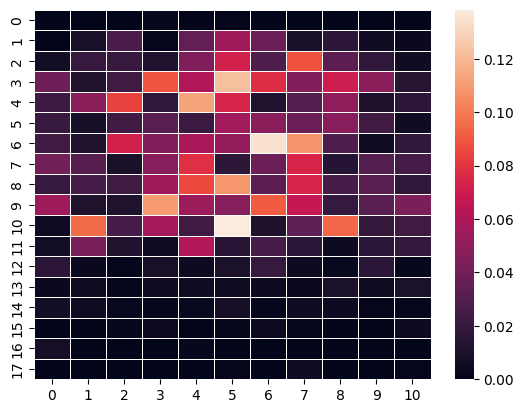

In [12]:
print("Start Holds:")
ax = sns.heatmap(np.mean(boulder_nps, axis=0)[0], linewidth=0.5)
plt.show()
print("Top Holds:")
ax = sns.heatmap(np.mean(boulder_nps, axis=0)[1], linewidth=0.5)
plt.show()
print("Holds:")
ax = sns.heatmap(np.mean(boulder_nps, axis=0)[2], linewidth=0.5)
plt.show()